In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


Does $E(2\bar{X})$ = b ?
$$
E(2\bar{X})={{(\sum{Xi} - 2\bar{X})^2} \over n} = {2 * E({{X1+X2+...+Xn} \over n})} = {2 \over n} * E({b/2 + b/ 2+...+b/2}) = {2 \over n} * {(n*b)/2} = b
$$
Therefore, $E(2\bar{X})$ = b and it is unbiased

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

Does $E({1\over \bar{X}})$ = $\lambda$?

In [38]:
lamest = [1/np.mean(stats.expon.rvs(scale = 1/5, size = 100)) for _ in np.arange(10000)]
np.mean(lamest)

5.052007537366668

$E({1\over \bar{X}})$ DOES NOT EQUAL $\lambda$ and it is biased because it should equal 5

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

$$
Var(2\bar{X}) = {{\sum( X - 2\bar{X})^2} \over n} = {4 Var(\bar{X})} = {4 Var({{X1+x2+...+Xn} \over n})} = {4 \over n^2} {\sum Var(Xi)} = {{4nb^2} \over {12n^2}} = {b^2 \over {3n}}
$$


This is consistent because as n goes to infinity, the variance goes to 0. 

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

$$
Var(X) = \sigma^2
$$
$$
Var(\bar{X}) = V({{X1+X2+...+Xn} \over n}) = {1 \over n^2} {\sum Var(Xi)} = {1 \over n^2} {n(Var(Xi))} = {Var(Xi) \over n} = {\sigma^2 \over n}
$$

This is consistent because as n goes to infinity, the variance goes to 0.

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

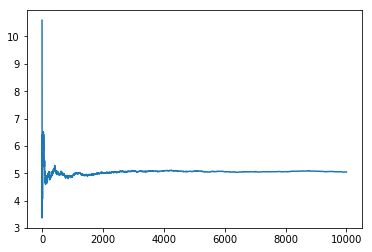

In [2]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()